## Decision Tree 

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [99]:
df = df.drop(["Ticket", "Cabin", "Fare", "PassengerId"], axis='columns')

In [100]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [101]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [102]:
df.drop("Name", axis="columns", inplace=True)

In [103]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [105]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [106]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [107]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [108]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


<AxesSubplot:xlabel='SibSp'>

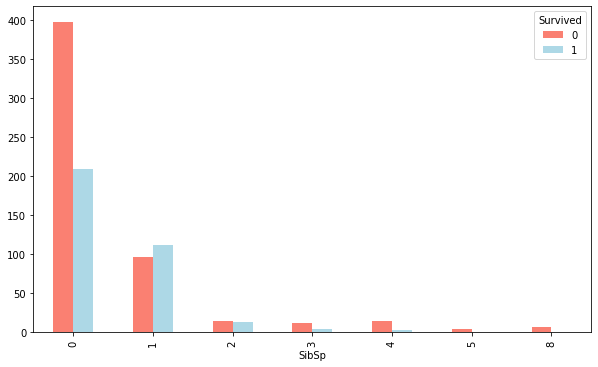

In [109]:
pd.crosstab(df.SibSp, df.Survived).plot(kind="bar", figsize=(10, 6), color=['salmon', 'lightblue'])

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

In [112]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [113]:
X = df.drop("Survived", axis="columns")
y = df["Survived"]

In [117]:
X["Sex"] = le_sex.fit_transform(X["Sex"])
X["Embarked"] = le_embarked.fit_transform(X["Embarked"])

In [118]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.000000,1,0,2
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,2
3,1,0,35.000000,1,0,2
4,3,1,35.000000,0,0,2
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,2
887,1,0,19.000000,0,0,2
888,3,0,29.699118,1,2,2
889,1,1,26.000000,0,0,0


In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
model = DecisionTreeClassifier()

In [124]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
model.fit(X_train, y_train)

DecisionTreeClassifier()